In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [20]:
df=pd.read_csv('pokemon_data.csv')
df=df.set_index('name')
df

,dexnum,generation,type1,type2,species,height,weight,ability1,ability2,hidden_ability,...,catch_rate,base_friendship,base_exp,growth_rate,egg_group1,egg_group2,percent_male,percent_female,egg_cycles,special_group
name,,,,,,,,,,,,,,,,,,,,,
Bulbasaur,1,1,Grass,Poison,Seed Pokémon,0.7,6.9,Overgrow,Chlorophyll,NaN,...,45,50,64,Medium Slow,Grass,Monster,87.5,12.5,20,Ordinary
Ivysaur,2,1,Grass,Poison,Seed Pokémon,1.0,13.0,Overgrow,Chlorophyll,NaN,...,45,50,142,Medium Slow,Grass,Monster,87.5,12.5,20,Ordinary
Venusaur,3,1,Grass,Poison,Seed Pokémon,2.0,100.0,Overgrow,Chlorophyll,NaN,...,45,50,236,Medium Slow,Grass,Monster,87.5,12.5,20,Ordinary
Charmander,4,1,Fire,NaN,Lizard Pokémon,0.6,8.5,Blaze,Solar Power,NaN,...,45,50,62,Medium Slow,Dragon,Monster,87.5,12.5,20,Ordinary
Charmeleon,5,1,Fire,NaN,Flame Pokémon,1.1,19.0,Blaze,Solar Power,NaN,...,45,50,142,Medium Slow,Dragon,Monster,87.5,12.5,20,Ordinary
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Raging Bolt,1021,9,Electric,Dragon,Paradox Pokémon,5.2,480.0,Protosynthesis,NaN,NaN,...,10,—,—,Slow,Undiscovered,NaN,NaN,NaN,—,Ancient Paradox
Iron Boulder,1022,9,Rock,Psychic,Paradox Pokémon,1.5,162.5,Quark Drive,NaN,NaN,...,10,—,—,Slow,Undiscovered,NaN,NaN,NaN,—,Future Paradox
Iron Crown,1023,9,Steel,Psychic,Paradox Pokémon,1.6,156.0,Quark Drive,NaN,NaN,...,10,—,—,Slow,Undiscovered,NaN,NaN,NaN,—,Future Paradox


In [21]:
capt=pd.read_csv('capture_flee_rate')
capt=capt.rename(columns={'Pokémon':'name'}).set_index('name')
capt

,Unnamed: 0,#,Base capture rate,Base flee rate,Movement type
name,,,,,
Bulbasaur,0,1,0.20,0.10,Jump
Ivysaur,1,2,0.10,0.07,Jump
Venusaur,2,3,0.05,0.05,Jump
Charmander,3,4,0.20,0.10,Jump
Charmeleon,4,5,0.10,0.07,Jump
...,...,...,...,...,...
Ursaluna,899,901,0.15,0.07,Jump
Basculegion,900,902,0.20,0.07,Hovering
Sneasler,901,903,0.30,0.10,Jump


In [22]:
df = pd.merge(
    df, 
    capt[['Base capture rate', 'Base flee rate', 'Movement type']], 
    left_index=True, 
    right_index=True, 
    how='inner'
)

#df=df.reset_index().dropna(subset=['name', 'Evolution_Stage', 'type1', 'Movement type'])
#df['Evolution_Stage'] = df['Evolution_Stage'].astype(int)
df

,dexnum,generation,type1,type2,species,height,weight,ability1,ability2,hidden_ability,...,growth_rate,egg_group1,egg_group2,percent_male,percent_female,egg_cycles,special_group,Base capture rate,Base flee rate,Movement type
name,,,,,,,,,,,,,,,,,,,,,
Bulbasaur,1,1,Grass,Poison,Seed Pokémon,0.7,6.9,Overgrow,Chlorophyll,NaN,...,Medium Slow,Grass,Monster,87.5,12.5,20,Ordinary,0.20,0.10,Jump
Ivysaur,2,1,Grass,Poison,Seed Pokémon,1.0,13.0,Overgrow,Chlorophyll,NaN,...,Medium Slow,Grass,Monster,87.5,12.5,20,Ordinary,0.10,0.07,Jump
Venusaur,3,1,Grass,Poison,Seed Pokémon,2.0,100.0,Overgrow,Chlorophyll,NaN,...,Medium Slow,Grass,Monster,87.5,12.5,20,Ordinary,0.05,0.05,Jump
Charmander,4,1,Fire,NaN,Lizard Pokémon,0.6,8.5,Blaze,Solar Power,NaN,...,Medium Slow,Dragon,Monster,87.5,12.5,20,Ordinary,0.20,0.10,Jump
Charmeleon,5,1,Fire,NaN,Flame Pokémon,1.1,19.0,Blaze,Solar Power,NaN,...,Medium Slow,Dragon,Monster,87.5,12.5,20,Ordinary,0.10,0.07,Jump
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Ursaluna,901,8,Ground,Normal,Peat Pokémon,2.4,290.0,Guts,Bulletproof,Unnerve,...,Medium Fast,Field,NaN,50.0,50.0,20,Ordinary,0.15,0.07,Jump
Basculegion,902,8,Water,Ghost,Big Fish Pokémon,3.0,110.0,Swift Swim,Adaptability,Mold Breaker,...,Medium Fast,Water 2,NaN,100.0,0.0,20,Ordinary,0.20,0.07,Hovering
Sneasler,903,8,Fighting,Poison,Free Climb Pokémon,1.3,43.0,Pressure,Unburden,Poison Touch,...,Medium Slow,Field,NaN,50.0,50.0,20,Ordinary,0.30,0.10,Jump


{'whiskers': [<matplotlib.lines.Line2D at 0x126236180>,
 'caps': [<matplotlib.lines.Line2D at 0x1262366f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x126235ee0>,
 'medians': [<matplotlib.lines.Line2D at 0x126236c00>,
 'fliers': [],
 'means': []}

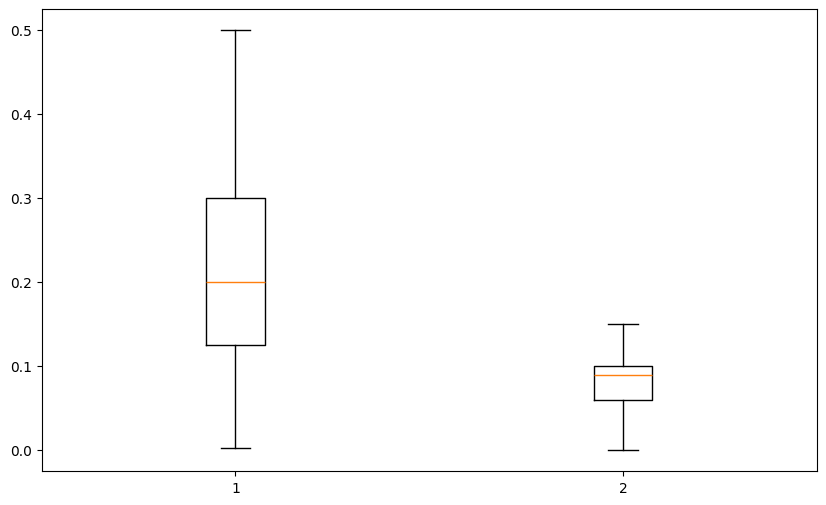

In [33]:
plt.figure(figsize=(10,6))
plt.boxplot([df['Base capture rate'], df['Base flee rate']], showfliers=False)